In [6]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/datasets/Exasens.csv')

data_cleaned = data.drop(columns=['ID'])
data_cleaned = data_cleaned.dropna(subset=['Imagery_part_min', 'Imagery_part_avg', 'Real_part_min', 'Real_part_avg'])

data_cleaned

,Diagnosis,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
0,COPD,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,COPD,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,-325.39,-316.155785,-478.52,-472.869783,0,65,2
...,...,...,...,...,...,...,...,...
366,Infected,-323.00,-314.384434,-476.12,-472.103689,1,38,1
367,Infected,-323.00,-314.323628,-476.12,-472.395413,1,36,1
368,Infected,-323.00,-312.856656,-480.91,-472.294281,0,33,1
369,Infected,-327.78,-319.305447,-476.12,-471.776918,1,43,1


In [ ]:
data_cleaned.to_csv('Exasens_cleaned.csv', index=False)

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt

# Encode the target variable (Diagnosis)
label_encoder = LabelEncoder()
data_cleaned['Diagnosis'] = label_encoder.fit_transform(data_cleaned['Diagnosis'])

# Separate features and target
X = data_cleaned.drop(columns=['Diagnosis'])
y = data_cleaned['Diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target variable to categorical (one-hot encoding)
y_categorical = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Build a neural network model
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')  # 4 output neurons for the 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=8)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy}")


Epoch 1/100
8/8 [==============================] - 1s 38ms/step - loss: 1.3493 - accuracy: 0.2031 - val_loss: 1.3903 - val_accuracy: 0.1250
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 1.2903 - accuracy: 0.5312 - val_loss: 1.3577 - val_accuracy: 0.3750
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 1.2427 - accuracy: 0.6719 - val_loss: 1.3306 - val_accuracy: 0.4375
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 1.1994 - accuracy: 0.6875 - val_loss: 1.3063 - val_accuracy: 0.5000
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 1.1549 - accuracy: 0.7031 - val_loss: 1.2854 - val_accuracy: 0.5625
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 1.1144 - accuracy: 0.7188 - val_loss: 1.2655 - val_accuracy: 0.5625
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 1.0789 - accuracy: 0.7500 - val_loss: 1.2466 - val_accuracy: 0.5625
Epoch 8/100
8/8 [=========

1/1 [==============================] - 0s 33ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.90      0.90      0.90        10
           2       0.67      0.86      0.75         7
           3       0.00      0.00      0.00         1

    accuracy                           0.75        20
   macro avg       0.39      0.44      0.41        20
weighted avg       0.68      0.75      0.71        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


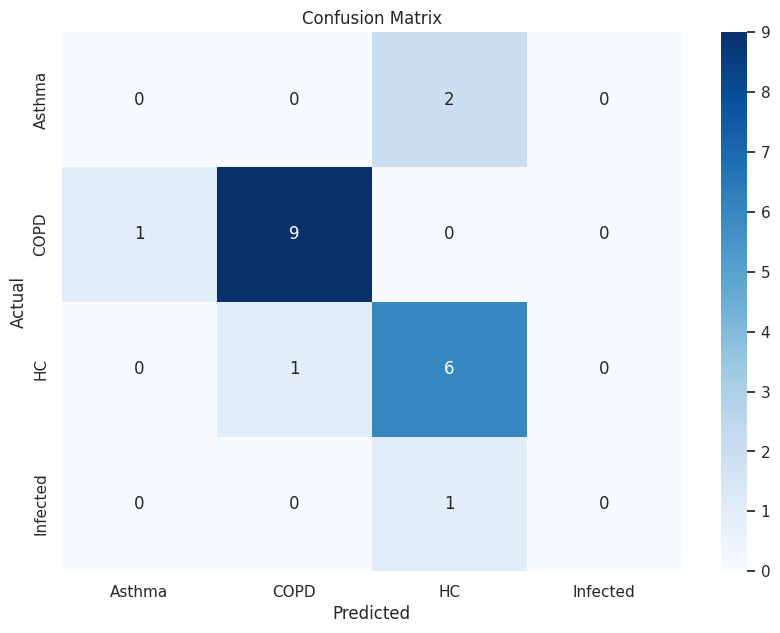

In [9]:
import numpy as np

# Evaluate the model on the test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification Report
report = classification_report(y_test_classes, y_pred)
print("Classification Report:")
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np

# Define the mapping manually if LabelEncoder is not behaving as expected
label_mapping = {
    0: "Asthma",
    1: "COPD",
    2: "HC",
    3: "Infected"
}

# Example input features (Gender, Age, Smoking, Imagery_part_min, Imagery_part_avg, Real_part_min, Real_part_avg)
# Replace with actual values you want to test
new_input = np.array([[-327.78,-318.229558,-471.34,-465.302094,0,46,3]])

# Scale the input using the same scaler used during training
new_input_scaled = scaler.transform(new_input)

# Make a prediction
prediction = model.predict(new_input_scaled)

# Find the index of the highest probability
predicted_class_index = np.argmax(prediction)

# Retrieve the corresponding label from the mapping
predicted_class = label_mapping[predicted_class_index]

# Print the predicted diagnosis
print(f"Predicted Diagnosis: {predicted_class}")


1/1 [==============================] - 0s 33ms/step
Predicted Diagnosis: Asthma


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
code = """import streamlit as st
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

data_cleaned = pd.read_csv("Exasens_cleaned.csv")

# Encode the target variable (Diagnosis)
label_encoder = LabelEncoder()
data_cleaned['Diagnosis'] = label_encoder.fit_transform(data_cleaned['Diagnosis'])

# Separate features and target
X = data_cleaned.drop(columns=['Diagnosis'])
y = data_cleaned['Diagnosis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target variable to categorical (one-hot encoding)
y_categorical = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Build a neural network model
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')  # 4 output neurons for the 4 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=8)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy}")

# Define the label mapping manually
label_mapping = {
    0: "Asthma",
    1: "COPD",
    2: "HC",
    3: "Infected"
}

# Streamlit app
st.title("Respiratory Disease Prediction")

# Input fields for user input
imagery_part_min = st.number_input("Imaginary Part Min", value=-300.5)
imagery_part_avg = st.number_input("Imaginary Part Avg", value=-305.45)
real_part_min = st.number_input("Real Part Min", value=-460.35)
real_part_avg = st.number_input("Real Part Avg", value=-470.12)
gender = st.selectbox("Gender", [1, 0], format_func=lambda x: "Male" if x == 1 else "Female")
age = st.number_input("Age", min_value=0, max_value=120, value=30)
smoking = st.selectbox("Smoking Status", [1, 2, 3], format_func=lambda x: {1: "Non-smoker", 2: "Ex-smoker", 3: "Active-smoker"}[x])

# Make prediction when the button is clicked
if st.button("Predict"):
    # Prepare the input data
    new_input = np.array([[imagery_part_min, imagery_part_avg, real_part_min, real_part_avg, gender, age, smoking]])

    # Scale the input
    new_input_scaled = scaler.transform(new_input)

    # Make a prediction
    prediction = model.predict(new_input_scaled)
    predicted_class_index = np.argmax(prediction)
    predicted_class = label_mapping[predicted_class_index]

    # Show the result
    st.write(f"Predicted Diagnosis: **{predicted_class}**")"""


# Save the script to a file
with open('/content/main.py', 'w') as f:
    f.write(code)


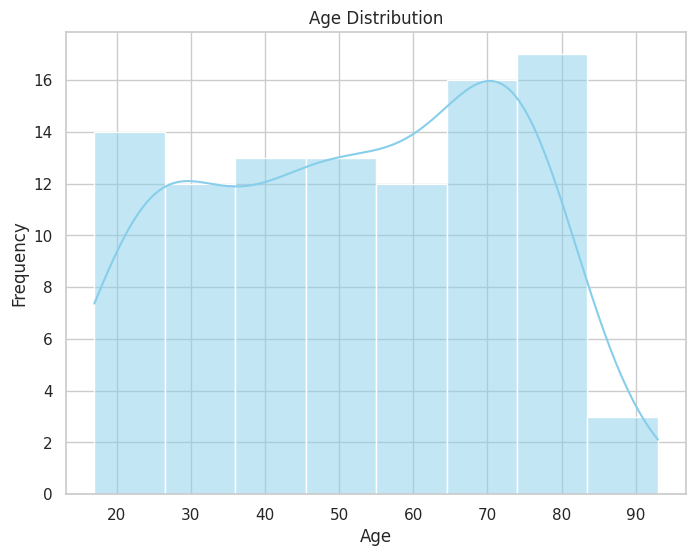

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
data_cleaned = pd.read_csv('/content/drive/MyDrive/datasets/Exasens_cleaned.csv')

# Set the plot style
sns.set(style="whitegrid")

# 1. Histogram for Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<ipython-input-3-5c6821e4b6d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data_cleaned, palette='viridis')


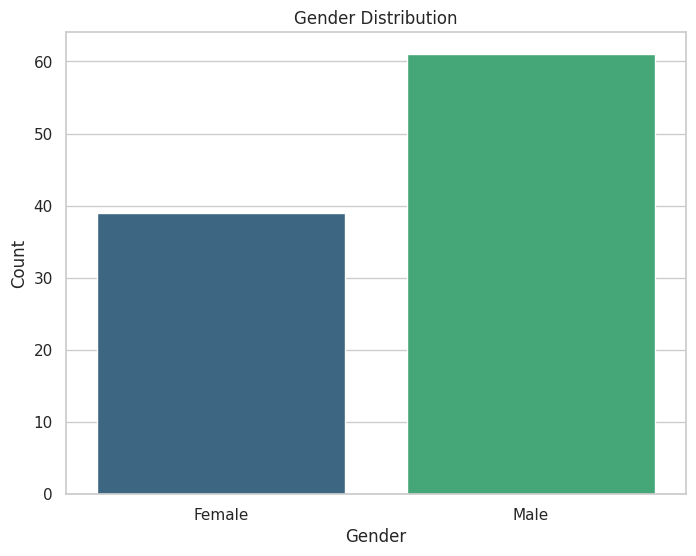

In [3]:

# 2. Bar Chart for Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data_cleaned, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


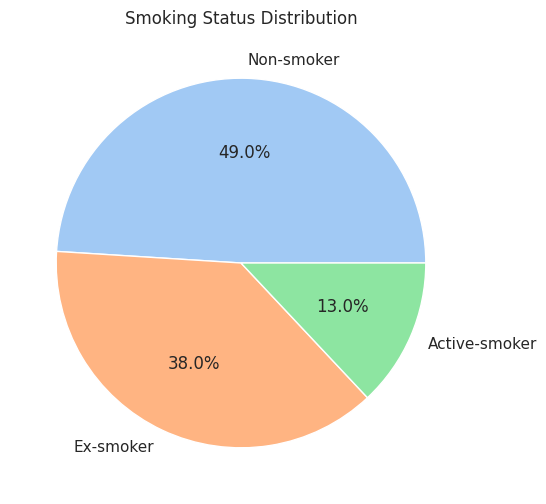

In [4]:
# 3. Pie Chart for Smoking Status
plt.figure(figsize=(8, 6))
smoking_counts = data_cleaned['Smoking'].value_counts()
plt.pie(smoking_counts, labels=['Non-smoker', 'Ex-smoker', 'Active-smoker'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Smoking Status Distribution')
plt.show()


<ipython-input-5-d6a967a58538>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='Imagery_part_min', data=data_cleaned, ax=axes[0, 0], palette='coolwarm')
<ipython-input-5-d6a967a58538>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='Imagery_part_avg', data=data_cleaned, ax=axes[0, 1], palette='coolwarm')
<ipython-input-5-d6a967a58538>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y='Real_part_min', data=data_cleaned, ax=axes[1, 0], palette='coolwarm')
<ipython-input-5-d6a967a58538>:13: F

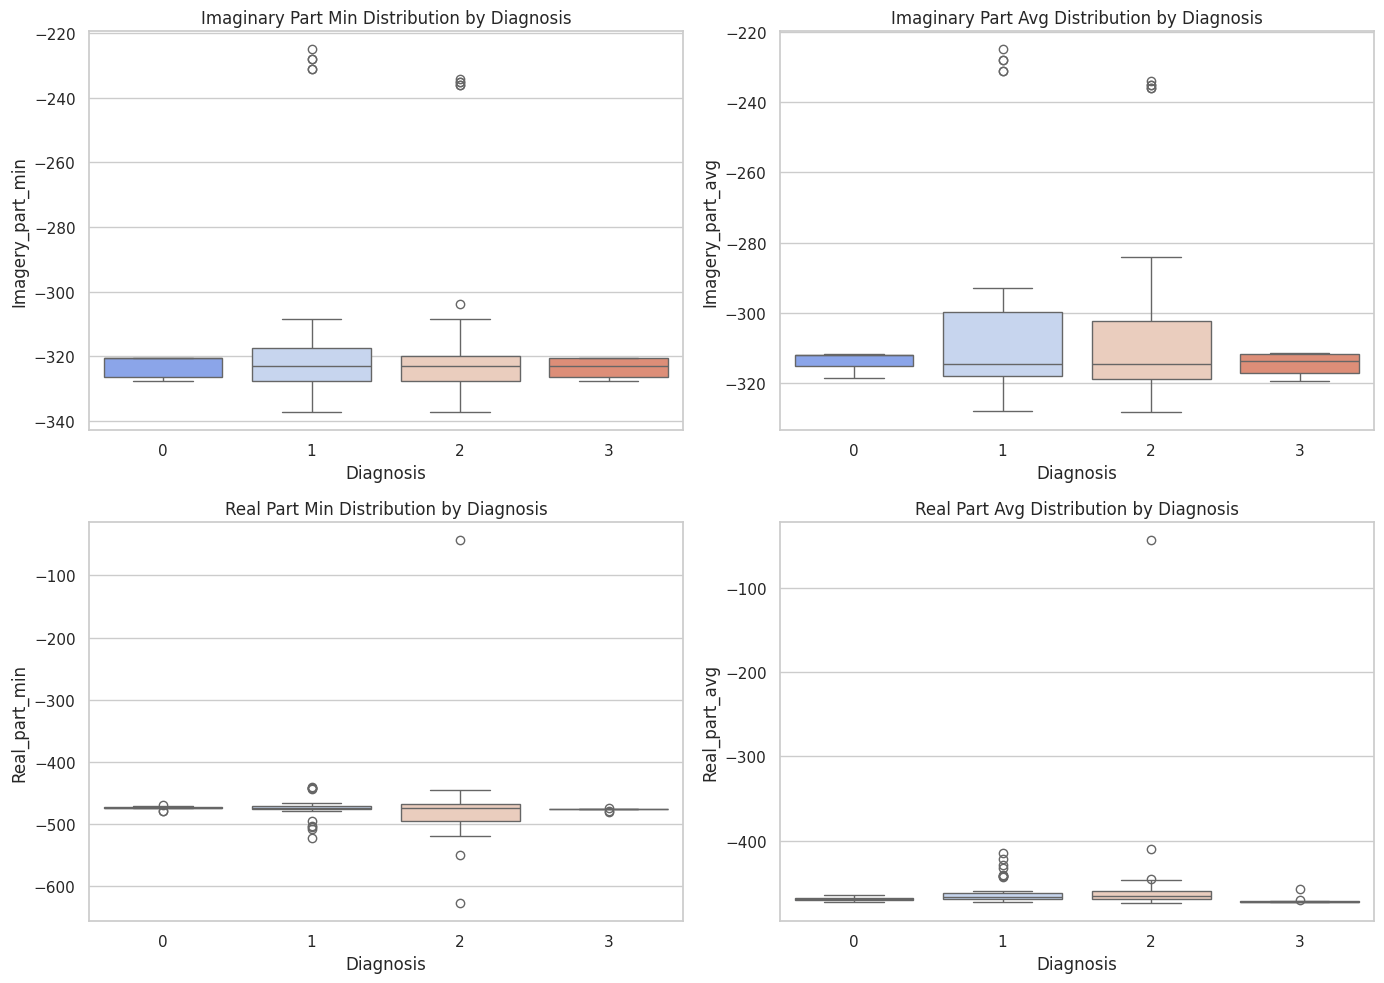

In [5]:
# 4. Boxplots for Permittivity Measurements (Imaginary and Real Parts)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x='Diagnosis', y='Imagery_part_min', data=data_cleaned, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Imaginary Part Min Distribution by Diagnosis')

sns.boxplot(x='Diagnosis', y='Imagery_part_avg', data=data_cleaned, ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Imaginary Part Avg Distribution by Diagnosis')

sns.boxplot(x='Diagnosis', y='Real_part_min', data=data_cleaned, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Real Part Min Distribution by Diagnosis')

sns.boxplot(x='Diagnosis', y='Real_part_avg', data=data_cleaned, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Real Part Avg Distribution by Diagnosis')

plt.tight_layout()
plt.show()